In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot
from keras.optimizers import SGD
np.set_printoptions(threshold=np.sys.maxsize)

In [66]:
#define the data
FullData = pd.read_csv("counter_Verification_Data.csv")

x, y = FullData.values[:, 1:-1], FullData.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
n_features = x_train.shape[1]

(90000, 4) (10000, 4) (90000,) (10000,)


In [64]:
# define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(n_features,), activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

predictions = model(np.asarray(x_train).astype('float32')).numpy()
#tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.MeanSquaredError(name='mean_squared_error')#tf.keras.losses.MeanAbsoluteError()#tf.keras.losses.SparseCategoricalCrossentropy()
loss_fn(y_train[:1], predictions).numpy()
opt = SGD(lr=0.01)


model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [68]:
history = model.fit(x, y, epochs=1000)

Epoch 1/1000
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0125 - accuracy: 0.9945
Epoch 2/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0123 - accuracy: 0.9945
Epoch 3/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0133 - accuracy: 0.9940
Epoch 4/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0124 - accuracy: 0.9944
Epoch 5/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0126 - accuracy: 0.9946
Epoch 6/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0130 - accuracy: 0.9943
Epoch 7/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0125 - accuracy: 0.9947
Epoch 8/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0128 - accuracy: 0.9944
Epoch 9/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0121 - accuracy: 0.9945
Epoch 10/1000
3125/3125 [==============================] - 4s 1m

KeyboardInterrupt: 

Train: 0.999, Test: 1.000


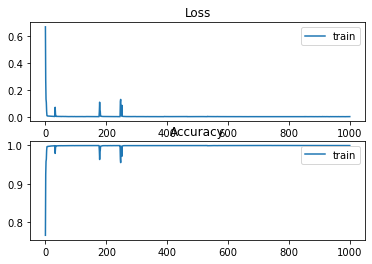

In [14]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [13]:
with open('Counterverificationmodel.pkl', 'wb') as f:
    pickle.dump({'weights': model.get_weights(), 'history': history.history}, f)


In [15]:
# load the weights and history from the file and evaluate the model
with open('Counterverificationmodel.pkl', 'rb') as f:
    data = pickle.load(f)
model.set_weights(data['weights'])

In [58]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()

# compute class-wise accuracy and confusion matrix
class_0_correct = 0
class_0_total = 0
class_0_true_0 = 0
class_0_false_1 = 0
class_1_correct = 0
class_1_total = 0
class_1_true_1 = 0
class_1_false_0 = 0
for i in range(len(y_test)):
    true_class = y_test[i]
    pred_class = y_pred_classes[i]
    if true_class == 0:
        class_0_total += 1
        if pred_class == 0:
            class_0_correct += 1
            class_0_true_0 += 1
        else:
            class_0_false_1 += 1
            print(i)
    elif true_class == 1:
        class_1_total += 1
        if pred_class == 1:
            class_1_correct += 1
            class_1_true_1 += 1
        else:
            class_1_false_0 += 1

class_0_accuracy = class_0_correct / class_0_total
class_1_accuracy = class_1_correct / class_1_total

print("Class 0:")
print(f"  Total: {class_0_total}")
print(f"  Correct: {class_0_correct}")
print(f"  True 0: {class_0_true_0}")
print(f"  False 1: {class_0_false_1}")
print(f"  Accuracy: {class_0_accuracy}")
print("Class 1:")
print(f"  Total: {class_1_total}")
print(f"  Correct: {class_1_correct}")
print(f"  True 1: {class_1_true_1}")
print(f"  False 0: {class_1_false_0}")
print(f"  Accuracy: {class_1_accuracy}")

62
313
441
596
761
762
767
1219
1277
1530
1596
1750
2080
2315
2493
2674
2703
2770
3479
3565
4004
4014
4335
4595
4888
5002
5559
5755
5756
5835
5956
6186
6543
7092
7149
7237
7565
7771
7956
8182
8281
8389
8401
8415
8927
9126
9221
10047
10198
10248
10981
12148
12211
12267
12378
12747
13494
13632
13682
13851
13894
14148
14276
14284
14527
14630
14766
14777
15033
15112
15197
15238
15401
15455
15573
15582
15728
16376
16424
16584
16667
16696
16940
17030
17089
17227
17438
17567
18036
18296
18303
18733
18830
19112
19184
19527
19768
19832
20031
20231
20678
20691
20858
21266
21269
21590
21665
21780
21848
22492
22588
22648
22756
22781
22802
22887
23175
23503
23753
23848
23890
24002
24320
24351
24449
24544
24774
24894
24903
25140
25247
25260
25369
25463
25513
25586
25601
26084
26302
26543
26607
26739
26798
26912
27164
27234
27404
27529
27772
27786
27834
27952
28450
28459
29032
29080
29264
29612
29752
30002
30353
30690
31279
31324
31349
31512
31551
31597
31836
31985
32121
32242
32359
32638
33206
Class